<a href="https://colab.research.google.com/github/harshitah2s4/Netflix-Data-Analysis-Project/blob/main/OlympicsDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [56]:
data1=pd.read_csv('/content/file.csv')

In [57]:
data1.head(8)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...


In [58]:
data1.shape

(7789, 11)

In [59]:
data1.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [60]:
data1.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [62]:
data1.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

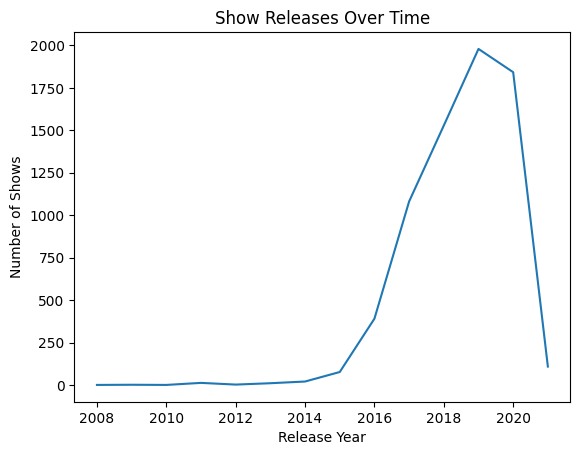

In [115]:

# Line Plot of Show Releases Over Time
release_counts = data1['Release_Year'].value_counts().sort_index()
plt.plot(release_counts.index, release_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Show Releases Over Time')
plt.show()

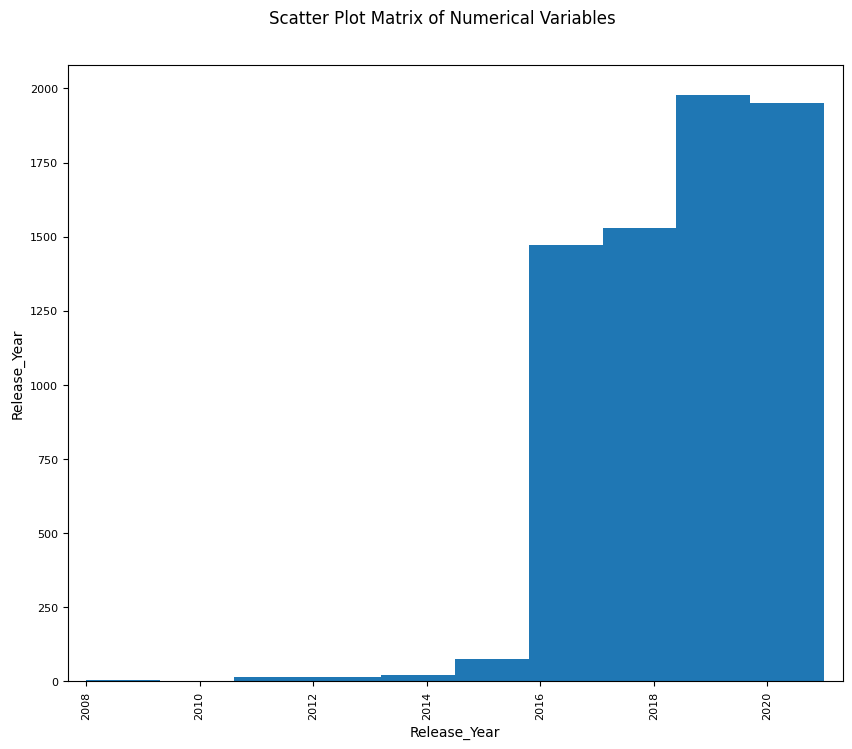

In [117]:
# Scatter Plot Matrix of Numerical Variables
pd.plotting.scatter_matrix(data1[['Duration', 'Release_Year', 'Rating']], figsize=(10, 8))
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=0.95)
plt.show()

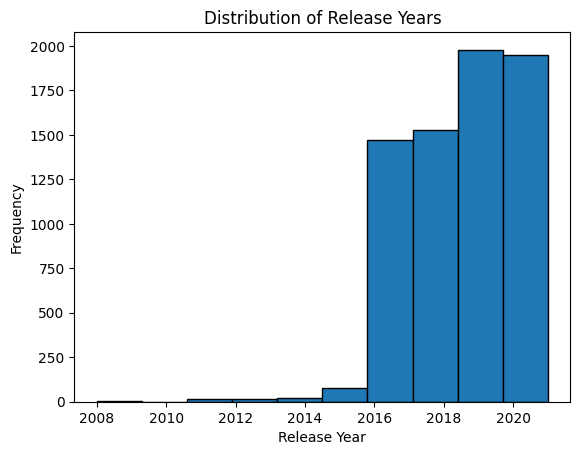

In [113]:

data1['Release_Year'] = pd.to_datetime(data1['Release_Date']).dt.year
plt.hist(data1['Release_Year'], bins=10, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()

**Removing duplicated records**

In [64]:
data1[data1.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [65]:
data1.drop_duplicates(inplace=True)

In [66]:
data1[data1.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


Removing null values from columns

In [67]:
data1.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


*shows no of null values in each column*

In [68]:
data1.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

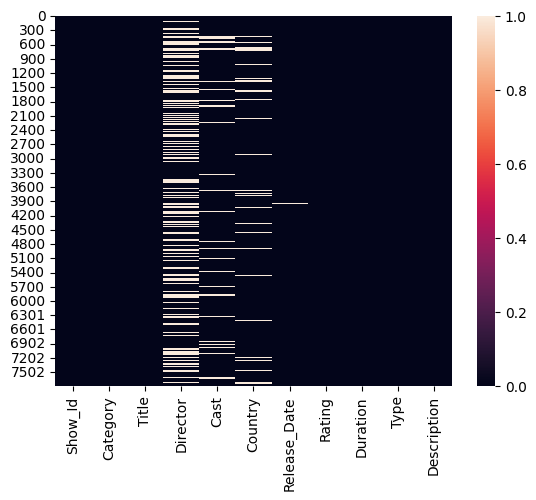

In [69]:
sns.heatmap(data1.isnull())


**Fetching Show_Id and Director of Title "9"**


In [70]:
data1["Title"].isin(['9'])

In [71]:
data1[data1['Title'].isin(['9'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


**Year in which highest number of movies/TV Shows released**

 Changing format of ReleaseDate Column to "%B %d, %Y"

*Got an error:time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 218. To fix this use strip function to remove leading spaces*





In [79]:
data1['Release_Date'] = data1['Release_Date'].str.strip()

In [80]:
data1['DateFormat']=pd.to_datetime(data1['Release_Date'])

In [81]:
data1['DateFormat'].dt.year.value_counts()

DateFormat
2019.0    1979
2020.0    1842
2018.0    1528
2017.0    1081
2016.0     391
2021.0     109
2015.0      77
2014.0      21
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2010.0       1
2008.0       1
Name: count, dtype: int64

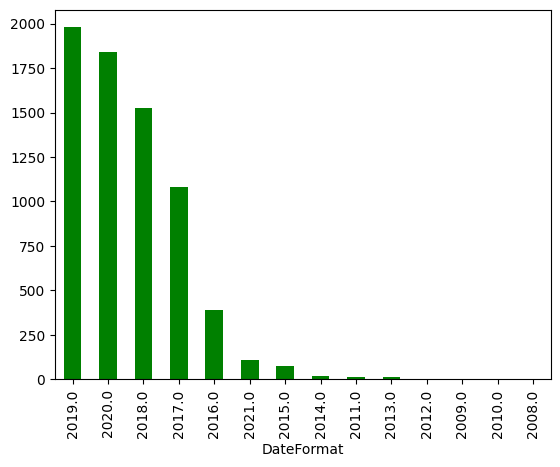

In [82]:
data1['DateFormat'].dt.year.value_counts().plot(kind='bar', color='green')
plt.show()

**Distribution of Movies and TV Shows categories**

In [76]:
data1.groupby('Category').Category.count()

Category
Movie      4951
TV Show    2118
Name: Category, dtype: int64

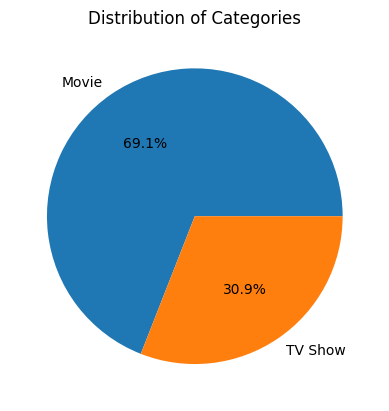

In [75]:
import matplotlib.pyplot as plt

# Assuming data1 is your DataFrame
category_counts = [5377, 2410]
category_labels = ['Movie', 'TV Show']

plt.pie(category_counts, labels=category_labels, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()


**Movies released in year 2016**

In [ ]:
data1.groupby('Category').Category.count()

<Axes: xlabel='count', ylabel='Category'>

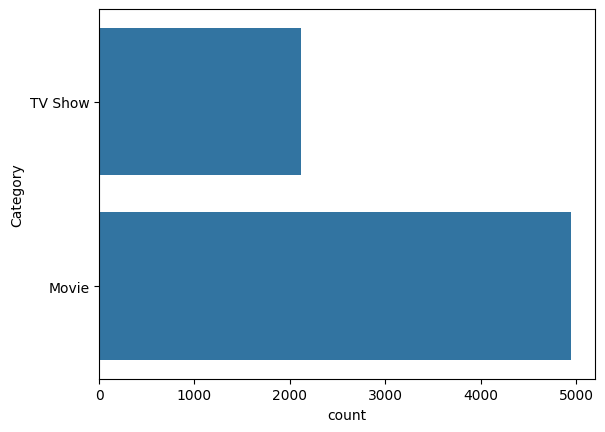

In [84]:
sns.countplot(y=data1["Category"])

**Movies released in 1999**

Creating a new column Year

In [85]:
data1.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20


In [86]:
data1['Year']=data1['DateFormat'].dt.year

In [87]:
data1.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0


In [88]:
data1[(data1['Category']=='Movie') & (data1['Year']==2016)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
59,s60,Movie,1000 Rupee Note,Shrihari Sathe,"Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...",India,"December 1, 2016",TV-14,89 min,"Dramas, International Movies",After randomly receiving a handsome political ...,2016-12-01,2016.0
62,s63,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...,2016-08-13,2016.0
102,s103,Movie,3 Türken & ein Baby,Sinan Akkuş,"Kostja Ullmann, Eko Fresh, Kida Khodr Ramadan,...",Germany,"December 15, 2016",TV-MA,93 min,"Comedies, International Movies",The lives of three dissatisfied brothers runni...,2016-12-15,2016.0
115,s116,Movie,4th Man Out,Andrew Nackman,"Evan Todd, Parker Young, Chord Overstreet, Jon...",United States,"May 5, 2016",NR,86 min,"Comedies, LGBTQ Movies",A young mechanic comes out to his extremely st...,2016-05-05,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,s7714,Movie,Yo-Kai Watch: The Movie,Mark Risley,"Johnny Yong Bosch, Joey D'Auria, Alicyn Packar...","Japan, United States","December 1, 2016",TV-Y7,96 min,"Anime Features, Children & Family Movies",Nate's special Yo-Kai Watch is missing. He tra...,2016-12-01,2016.0
7716,s7715,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...,2016-12-02,2016.0
7728,s7727,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",2016-07-01,2016.0
7739,s7738,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,"November 1, 2016",NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a...",2016-11-01,2016.0


**TV Shows Titles released in India**

In [89]:
data1[(data1["Category"]=="TV Show")& (data1["Country"]=="India")]["Title"]


86                 21 Sarfarosh: Saragarhi 1897
132                                   7 (Seven)
340                                Agent Raghav
364                                Akbar Birbal
534                 Anjaan: Special Crimes Unit
698                  Badalte Rishton Ki Dastaan
750                               Bard of Blood
856                                      Betaal
879                                 Bh Se Bhade
880                          Bhaag Beanie Bhaag
881                              Bhaage Re Mann
1316                               Chhota Bheem
1412                            Classic Legends
1463                            College Romance
1622                       Darr Sabko Lagta Hai
1691                                Delhi Crime
1729              Devlok with Devdutt Pattanaik
1736                              Dharmakshetra
2005                          Engineering Girls
2331                  Gabru: Hip Hop Revolution
2350                          Gangs of H

**TOP 5 directors who directed highest number of TV Shows and Movies to Netflix**

In [90]:
data1["Director"].value_counts().head(5)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: count, dtype: int64

**Movies where "Category is Movies and Type is Comedies" or "Country is United Kingdom"**

In [91]:
data1[(data1["Category"]=="Movie")& (data1["Type"]=="Comedies") | (data1["Country"]=="United Kingdom")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,"August 7, 2020",TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020-08-07,2020.0
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0


Total Categories starring Tom Cruise

In [92]:
data1[data1['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


Creating new dataframe

In [74]:

# Replace NaN values in the 'Cast' column with an empty string
data1['Cast'] = data1['Cast'].fillna('')

# Now you can use .str.contains() without encountering the ValueError
filtered_data = data1[data1['Cast'].str.contains('Tom Cruise')]


In [73]:
# Drop rows with NaN values in the 'Cast' column
data1.dropna(subset=['Cast'], inplace=True)

# Now you can use .str.contains() without encountering the ValueError
filtered_data = data1[data1['Cast'].str.contains('Tom Cruise')]


In [93]:
filtered_data[data1['Cast'].str.contains('Tom Cruise')]

<ipython-input-93-88f3bbfd55c1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data[data1['Cast'].str.contains('Tom Cruise')]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


**Ratings by Netflix**

In [94]:
data1['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'NR', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**TV SHOWS that got R rating after year 2014**

In [95]:
data1[(data1["Category"]=="TV Show")& (data1['Rating']=='R') & (data1["Year"]>2014)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year
4497,s4498,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016-12-10,2016.0
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


**Maximum Movie/TV Show duration on netflix**

In [96]:
data1.Duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '99 min', '102 min',
       '104 min', '105 min', '125 min', '81 min', '97 min', '106 min',
       '107 min', '109 min', '44 min', '101 min', '90 min', '3 Seasons',
       '37 min', '113 min', '114 min', '130 min', '94 min', '140 min',
       '135 min', '82 min', '70 min', '121 min', '92 min', '164 min',
       '83 min', '116 min', '84 min', '86 min', '120 min', '96 min',
       '126 min', '75 min', '129 min', '77 min', '137 min', '148 min',
       '122 min', '176 min', '85 min', '22 min', '68 min', '111 min',
       '29 min', '142 min', '168 min', '21 min', '59 min', '98 min',
       '108 min', '26 min', '156 min', '28 min', '57 min', '150 min',
       '133 min', '115 min', '154 min', '127 min', '146 min', '136 min',
    

In [97]:
data1.Duration.dtypes

dtype('O')

Making two new columns Quantity, Unit

In [98]:
data1[['Quantity','Unit']]=data1['Duration'].str.split(' ', expand=True)

In [ ]:
data1.head(3)

In [100]:
data1['Quantity'].max()

'99'

**Country with highest number of TV Shows**

In [101]:
data1[(data1['Category']=='TV Show')& (data1['Rating']=='R')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year,Quantity,Unit
4497,s4498,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016-12-10,2016.0,1,Season
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0,1,Season


**Country with highest number of TV Shows**

In [102]:
data_tvshow=data1[data1['Category']=='TV Show']

In [103]:
data_tvshow.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year,Quantity,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0,1,Season
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018-11-30,2018.0,1,Season
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019-03-20,2019.0,1,Season
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2020-01-23,2020.0,2,Seasons


In [104]:
data_tvshow.Country.value_counts()

Country
United States                                    581
United Kingdom                                   169
Japan                                            155
South Korea                                      145
Taiwan                                            68
                                                ... 
Australia, Canada                                  1
Denmark, Singapore, Canada, United States          1
South Korea, China                                 1
Mexico, United States, Spain, Colombia             1
United States, France, South Korea, Indonesia      1
Name: count, Length: 172, dtype: int64

In [105]:
data_tvshow.Country.value_counts().head(1)

Country
United States    581
Name: count, dtype: int64

**Sort dataset by Year**

In [107]:
data1.sort_values(by='Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year,Quantity,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0,104,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0,84,min
7232,s7231,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro...",2011-10-01,2011.0,93,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,Seasons


In [108]:
data1.sort_values(by='Year', ascending= False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year,Quantity,Unit
2505,s2506,Movie,Gothika,Mathieu Kassovitz,"Halle Berry, Robert Downey Jr., Charles S. Dut...","United States, France, Canada, Spain","January 1, 2021",R,98 min,"Horror Movies, Thrillers","After a car crash, a criminal psychiatrist awa...",2021-01-01,2021.0,98,min
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States","January 16, 2021",PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021-01-16,2021.0,108,min
3558,s3559,Movie,Leap!,"Eric Summer, Éric Warin","Bronwen Mantel, Mel Brooks, Maddie Ziegler, Da...","France, Canada","January 7, 2021",PG,89 min,"Children & Family Movies, Comedies","Félicie and Victor, two young friends in 1880s...",2021-01-07,2021.0,89,min
3544,s3545,TV Show,Last Tango in Halifax,Juliet May,"Derek Jacobi, Anne Reid, Sarah Lancashire, Nic...",United Kingdom,"January 12, 2021",TV-MA,4 Seasons,"British TV Shows, Romantic TV Shows, TV Dramas",Two widowed childhood sweethearts fall for eac...,2021-01-12,2021.0,4,Seasons
6502,s6501,Movie,The Intouchables,"Olivier Nakache, Éric Toledano","François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",France,"January 11, 2021",R,112 min,"Comedies, Dramas, International Movies","In need of a caregiver, a wealthy aristocrat w...",2021-01-11,2021.0,112,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,Seasons


**Find all instances where Category='Movie' and Type='Dramas'**

In [109]:
data1[(data1['Category']=='Movie')& (data1['Type']=='Dramas')].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,DateFormat,Year,Quantity,Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min
